In [150]:
include("helper.jl")
include("algorithms.jl")

# For autoreload file
#using Revise
#import helper

overlap_r (generic function with 4 methods)

In [2]:
Threads.nthreads()

6

# Metropolis

In [137]:
@time begin

    N = 100
    nb_iter = 100 * N
    nb_exp = 100
    x_star = generate_x(N)
    a = 5.9
    b = 0.1

    overlap_hat_metropolis = run_experiment(N, a, b,
        x_star, metropolis, nb_iter, nb_exp)
end

  2.233786 seconds (17.73 M allocations: 3.421 GiB, 37.14% gc time, 18.30% compilation time)


1×10000 Matrix{Float64}:
 0.0774  0.0778  0.0832  0.0836  0.0846  …  0.8442  0.8438  0.8426  0.8426

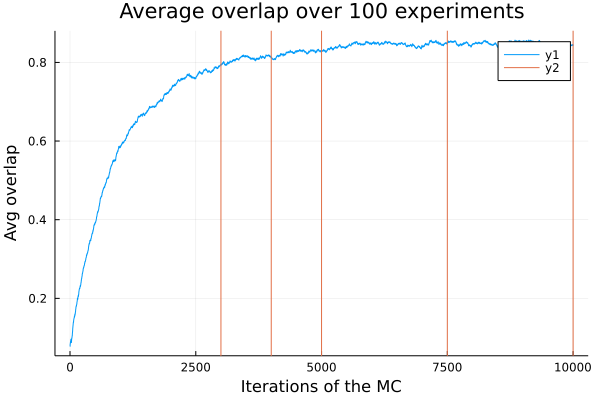

In [145]:
x_vlines = N .* Vector{Int8}([30, 40, 50, 75, 100])
visualize_overlap(overlap_hat_metropolis[1, :], nb_exp, x_vlines)

In [148]:
@time begin

    N = 1000
    nb_iter = 50 * N
    nb_exp = 100
    x_star = generate_x(N)
    d = 3
    nb_r = 15

    overlap_r_vector_metropolis, range_r = overlap_r(x_star, metropolis, N, nb_iter, nb_exp, d, 0, nb_r)
end

1836.476415 seconds (5.03 G allocations: 7.661 TiB, 26.22% gc time, 0.06% compilation time)


([0.46771999999999997, 0.43695999999999996, 0.47859999999999997, 0.5192, 0.49660000000000004, 0.6046600000000001, 0.6544199999999999, 0.7369, 0.7532800000000001, 0.7605200000000001, 0.6817399999999999, 0.45744, 0.051559999999999995, 0.028239999999999994, 0.02374], [1.0e-5, 2.2758459260747865e-5, 5.1794746792312125e-5, 0.00011787686347935878, 0.00026826957952797245, 0.0006105402296585327, 0.0013894954943731374, 0.0031622776601683794, 0.0071968567300115215, 0.016378937069540637, 0.0372759372031494, 0.08483428982440722, 0.193069772888325, 0.4393970560760791, 1.0])

In [151]:
plot_overlap_r(overlap_r_vector_metropolis, range_r, d)

LoadError: Cannot convert Float64 to series data for plotting

# Houdayer

In [71]:
@time begin

    N = 500
    nb_iter = 10000
    nb_exp = 100
    x_star = generate_x(N)
    a = 5.9
    b = 0.1

    overlap_hat_houdayer = run_experiment(N, a, b,
        x_star, houdayer, nb_iter, nb_exp)
end

970.336364 seconds (1.33 G allocations: 2.924 TiB, 4.14% gc time)


1×10000 Matrix{Float64}:
 0.03472  0.03608  0.03644  0.03532  …  0.17404  0.1688  0.17072  0.17444

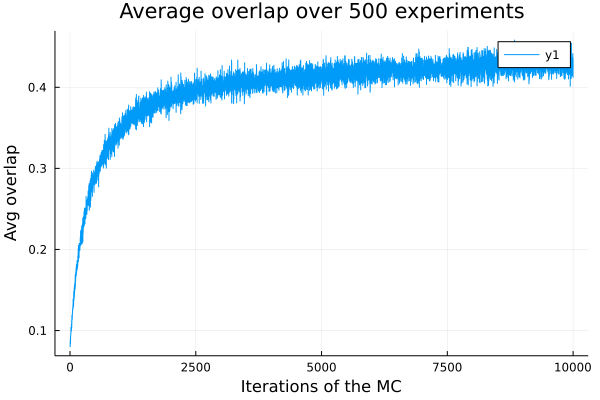

In [30]:
visualize_overlap(overlap_hat_houdayer[1, :], nb_exp)

In [51]:
@time begin

    N = 100
    nb_iter = 5000
    nb_exp = 200
    x_star = generate_x(N)
    d = 3

    overlap_r_vector_houdayer, range_r = overlap_r(x_star, houdayer, N, nb_iter, nb_exp, d)
    
end

([0.5045, 0.47119999999999995, 0.4743999999999998, 0.4534, 0.4618, 0.4622000000000001, 0.4714999999999999, 0.4405000000000001, 0.4275999999999999, 0.4885  …  0.3803000000000001, 0.3777, 0.3057, 0.2873, 0.2584, 0.21280000000000002, 0.15459999999999996, 0.12989999999999996, 0.10570000000000002, 0.0817], [1.0e-10, 1.4773776525985098e-10, 2.1826447283974916e-10, 3.224590545296398e-10, 4.76393801040134e-10, 7.038135554931547e-10, 1.039798418481492e-9, 1.5361749466718297e-9, 2.2695105366946685e-9, 3.352924149249553e-9  …  0.02982471286216891, 0.04406236427773573, 0.0650967523045817, 0.09617248711152965, 0.14208308325339222, 0.20991037201085547, 0.3101168926574778, 0.45815976690544913, 0.6768750009458534, 1.0])

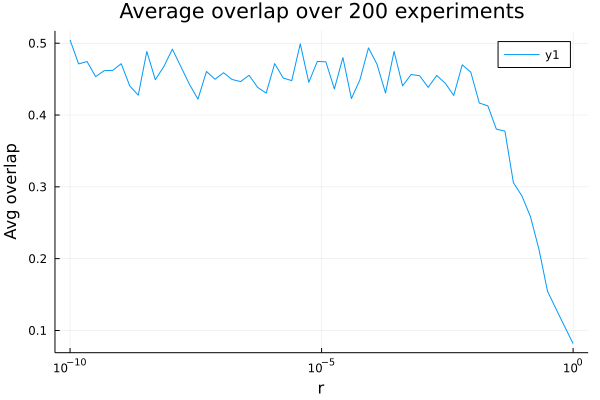

In [53]:
plot_overlap_r(overlap_r_vector_houdayer, range_r)

# Houdayer mixed

In [64]:
@time begin

    N = 1000
    nb_iter = 50_000
    nb_exp = 100
    x_star = generate_x(N)
    a = 5.9
    b = 0.1
    n0 = 500

    overlap_hat_houdayer_mixed = run_experiment(N, a, b,
        x_star, houdayer_mixed, nb_iter, nb_exp, n0)
end

 46.867015 seconds (153.00 M allocations: 164.639 GiB, 23.08% gc time)


1×50000 Matrix{Float64}:
 0.03292  0.03276  0.03272  0.0324  …  0.21524  0.21524  0.2152  0.21044

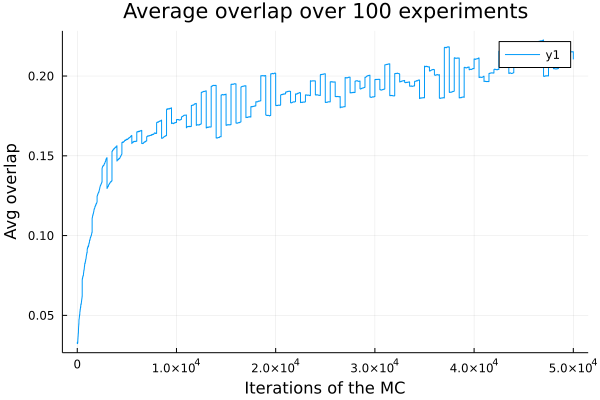

In [65]:
visualize_overlap(overlap_hat_houdayer_mixed[1, :], nb_exp)

In [ ]:
@time begin

    N = 100
    nb_iter = 5000
    nb_exp = 200
    x_star = generate_x(N)
    d = 3
    n0 = 100

    overlap_r_vector_houdayer_mixed, range_r = overlap_r(x_star, houdayer_mixed, N, nb_iter, nb_exp, d, n0)
    
end

In [ ]:
plot_overlap_r(overlap_r_vector_houdayer_mixed, range_r)

# Tests

In [9]:
matrix = falses(10, 10)

10×10 BitMatrix:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0

In [10]:
tst = Vector{Int8}([1, 2, 1, 2 ,3, 1, 7, 8, 9, 1])
mask = findall(tst .== 1)

4-element Vector{Int64}:
  1
  3
  6
 10

In [13]:
matrix[mask, :] = ones(4, 10)

4×10 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [15]:
matrix

10×10 BitMatrix:
 1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1